In [21]:
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [23]:
with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)
    sentences = []
    labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    
 #first 20K   
training_sentences = sentences[0:training_size]
#Remaining 
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [25]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [26]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [27]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 1s - loss: 0.6529 - accuracy: 0.6102 - val_loss: 0.5404 - val_accuracy: 0.7857
Epoch 2/30
625/625 - 1s - loss: 0.4088 - accuracy: 0.8400 - val_loss: 0.3771 - val_accuracy: 0.8442
Epoch 3/30
625/625 - 1s - loss: 0.3013 - accuracy: 0.8817 - val_loss: 0.3494 - val_accuracy: 0.8554
Epoch 4/30
625/625 - 1s - loss: 0.2518 - accuracy: 0.9036 - val_loss: 0.3431 - val_accuracy: 0.8571
Epoch 5/30
625/625 - 1s - loss: 0.2163 - accuracy: 0.9184 - val_loss: 0.3493 - val_accuracy: 0.8527
Epoch 6/30
625/625 - 1s - loss: 0.1900 - accuracy: 0.9275 - val_loss: 0.3626 - val_accuracy: 0.8499
Epoch 7/30
625/625 - 1s - loss: 0.1677 - accuracy: 0.9372 - val_loss: 0.3860 - val_accuracy: 0.8433
Epoch 8/30
625/625 - 1s - loss: 0.1517 - accuracy: 0.9450 - val_loss: 0.3817 - val_accuracy: 0.8533
Epoch 9/30
625/625 - 1s - loss: 0.1357 - accuracy: 0.9521 - val_loss: 0.3983 - val_accuracy: 0.8529
Epoch 10/30
625/625 - 1s - loss: 0.1228 - accuracy: 0.9574 - val_loss: 0.4320 - val_accuracy: 0.8435

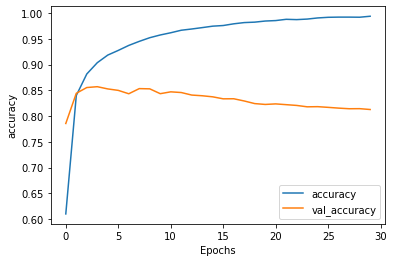

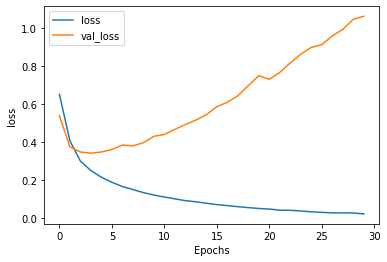

In [30]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [32]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [33]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [55]:
sentence = ["what an amazing week ", "We started to see the emergence of hateful comments well before Trump."]

sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[8.0683742e-05]
 [2.9821396e-03]]
